Shyam Kumar Ray Yadav (18449154)

Sonu Kumar (15651099)

Ahmad Raza Khawaja (25848862)

## Exercise 4.1: evolution of age distribution.

The file **population_us.csv** contains data about the age and gender distribution of the US population between 1850 and 2000. (It is taken from the **vega_datasets** package and unfortunately does not provide a source, but it is good enough for our purpose of practicing.) **sex=1** encodes \`male\'\, **sex=2** encodes \`female\' \(other gender assignments are not captured by the dataset), the rest of dataset format should be self-explanatory. Visualize (parts of) this dataset with a particular focus on the two following aspects:

 1. The evolution of the population age distribution over time.


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = pd.read_csv('population_us.csv')
data

,year,age,sex,people
0,1850,0,1,1483789
1,1850,0,2,1450376
2,1850,5,1,1411067
3,1850,5,2,1359668
4,1850,10,1,1260099
...,...,...,...,...
565,2000,80,2,3221898
566,2000,85,1,970357
567,2000,85,2,1981156
568,2000,90,1,336303


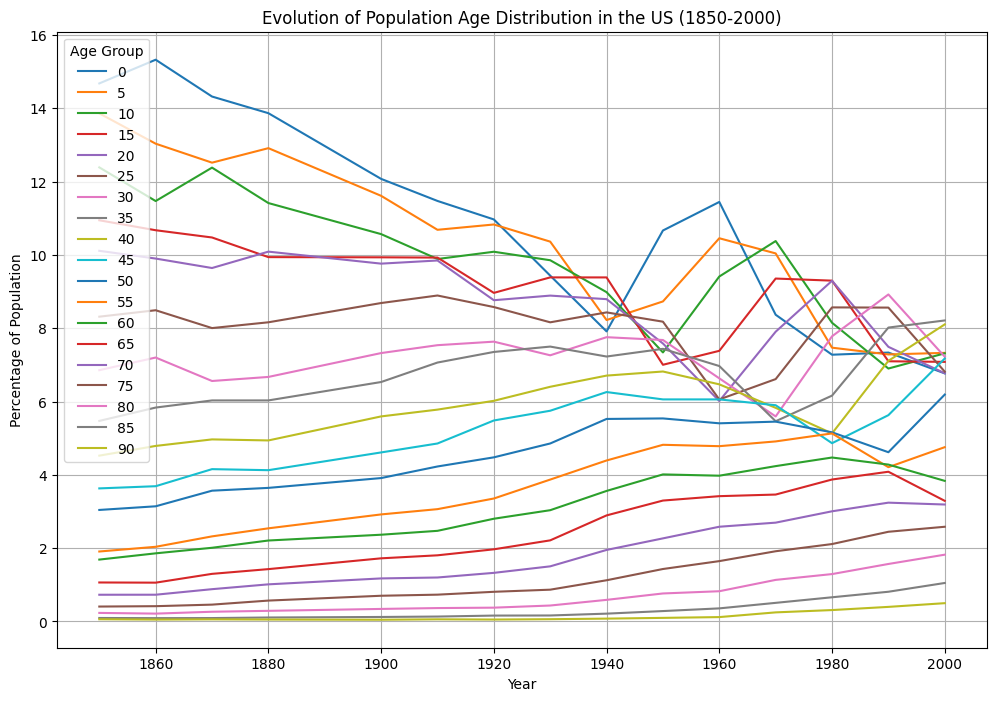

In [40]:

# Group the total population for each year
year_groupby = data.groupby('year')['people'].sum().reset_index()

# Group the total population for each year and age
year_age_groupby = data.groupby(['year', 'age'])['people'].sum().reset_index()

# Calculate the percentage of population for each age group in each year
year_age_percentage_list = []
for year in year_groupby['year']:
    year_data = year_age_groupby[year_age_groupby['year'] == year]
    total_population_year = year_groupby[year_groupby['year'] == year]['people'].iloc[0]
    for _, row in year_data.iterrows():
        percentage = (row['people'] / total_population_year) * 100
        year_age_percentage_list.append([year, row['age'], percentage])

# Create a DataFrame from the percentage list
year_age_percentage_df = pd.DataFrame(year_age_percentage_list, columns=['year', 'age', 'percentage'])

# Plot the evolution of the population age distribution over time
plt.figure(figsize=(12, 8))
for age_group in year_age_percentage_df['age'].unique():
    age_group_data = year_age_percentage_df[year_age_percentage_df['age'] == age_group]
    plt.plot(age_group_data['year'], age_group_data['percentage'], label=str(age_group))

plt.title('Evolution of Population Age Distribution in the US (1850-2000)')
plt.xlabel('Year')
plt.ylabel('Percentage of Population')
plt.legend(title='Age Group')
plt.grid(True)
plt.show()



2. The deviations between male and female distributions.


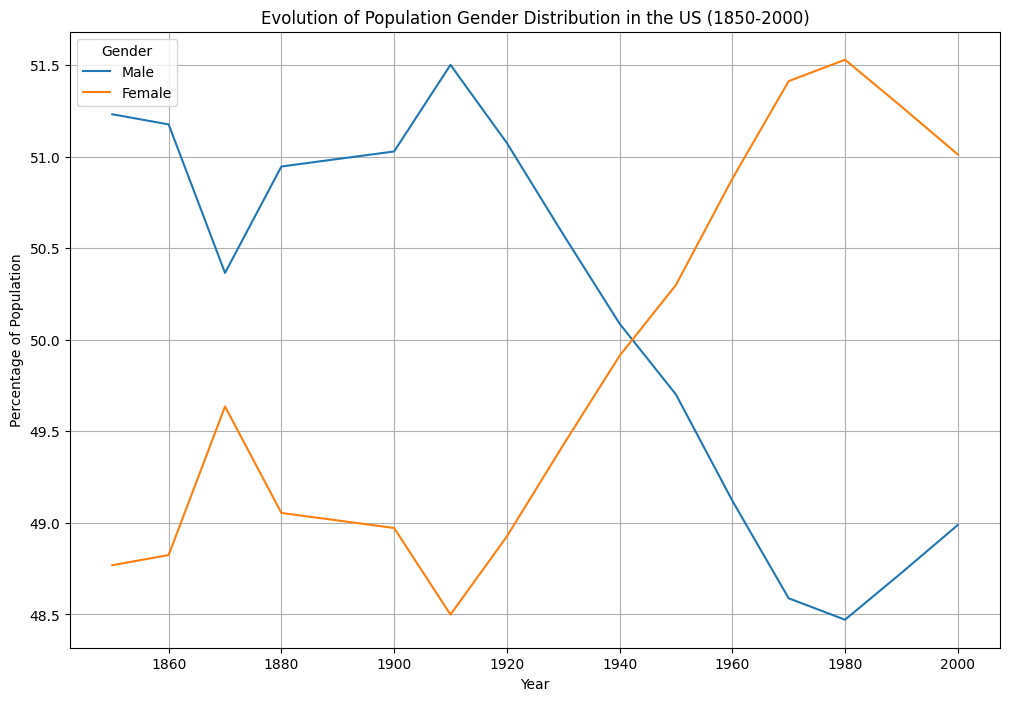

In [41]:
# Calculate the total population for each year and sex
total_population = data.groupby(['year','sex'], as_index=False)['people'].sum()

# Calculate the total population for each year
year_df = data.groupby('year', as_index=False)['people'].sum()

# Initialize lists to store data
newList = []

# Loop over sex groups and years
for sex_group in total_population['sex'].unique():
    for year in total_population['year'].unique():
        newList2 = []
        newList2.append(year)
        newList2.append(sex_group)
        
        # Calculate the percentage of population in each sex group for each year
        sex_group_value = total_population[(total_population['year'] == year) & (total_population['sex'] == sex_group)]['people'].tolist()[0]
        total_population_year = year_df[(year_df['year'] == year)]['people'].tolist()[0]
        newList2.append((sex_group_value / total_population_year) * 100)

        newList.append(newList2)

# Create a DataFrame from the list
newDf = pd.DataFrame(newList, columns=['year', 'sex', 'percentage'])

# Plot the evolution of the population gender distribution over time
plt.figure(figsize=(12, 8))

for sex_group in newDf['sex'].unique():
    gender = 'Male' if sex_group == 1 else 'Female'
    plt.plot(newDf[newDf['sex'] == sex_group]['year'], 
             newDf[newDf['sex'] == sex_group]['percentage'], 
             label=gender)

plt.title('Evolution of Population Gender Distribution in the US (1850-2000)')
plt.xlabel('Year')
plt.ylabel('Percentage of Population')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

## Exercise 4.2: meshes.


In [ ]:
#I will be doing this exercise later on. 